In [102]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../..'))
from g4l.estimators import BIC
from g4l.estimators import SMC
import g4l.display
from g4l.estimators import Prune
from g4l.models import ContextTree
from g4l.models import integrity
from g4l.data import Sample

## Comparing the mutual ocurrence of trees between methods

In [171]:
results_folder = os.path.abspath('../../examples/example2/results')
methods = ['SeqROCTM', 'prune', 'smc']
models = ['model1', 'model2']
sizes = [5000, 10000, 20000]
correct_model = '000 1 10 100'

def get_results(method, model_name, size):
    file = '%s/%s/%s_%s.csv' % (results_folder, method, model_name, size)
    return pd.read_csv(file)    

def compare(method1, method2):
    df = pd.DataFrame(columns=['sample_idx', 'precision', 'recall'])
    df1 = get_results(method1, model, size)
    df2 = get_results(method2, model, size)
    for sample_idx in df1.sample_idx.unique():
        trees1 = df1[df1.sample_idx == sample_idx]
        trees2 = df2[df2.sample_idx == sample_idx]
        trees2['match'] = trees2.tree.isin(trees1.tree).astype(int)
        trees1['match'] = trees1.tree.isin(trees2.tree).astype(int)
        #trees2[['model_name', 'sample_idx', 'num_contexts', 'match', 'tree']]
        precision = trees2['match'].sum()/len(trees2)
        recall = trees1['match'].sum()/len(trees1)
        df.loc[len(df)] = [int(sample_idx), precision, recall]
    return df

### Model 1

In [177]:
sample_idx = 2
size = 5000
model = 'model1'

df = compare('SeqROCTM', 'prune')
df.head(40)

<ipython-input-171-09ecc9a02333>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees2['match'] = trees2.tree.isin(trees1.tree).astype(int)
<ipython-input-171-09ecc9a02333>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees1['match'] = trees1.tree.isin(trees2.tree).astype(int)


,sample_idx,precision,recall
0,0.0,0.450000,1.000000
1,1.0,0.150000,0.333333
2,2.0,0.650000,1.000000
3,3.0,0.450000,1.000000
4,4.0,0.150000,0.375000
5,5.0,0.315789,0.750000
6,6.0,0.350000,0.875000
7,7.0,0.350000,0.700000
8,8.0,0.500000,1.000000
9,9.0,0.450000,0.750000


In [176]:
df.mean()

sample_idx    49.500000
precision      0.488524
recall         0.128605
dtype: float64

In [189]:
x = get_results('prune', 'model1', 10000)
x

,model_name,sample_idx,method,tree_idx,tree,num_contexts,opt
0,model1,0,prune,0,000000 000001 000010 000100 000101 001000 0010...,21,0
1,model1,0,prune,1,000000 000001 000010 000100 000101 001000 0010...,20,0
2,model1,0,prune,2,000000 000001 000010 000100 001000 00101 00101...,19,0
3,model1,0,prune,3,000000 000001 000010 000100 001000 001010 1000...,18,0
4,model1,0,prune,4,000000 00001 000010 000100 001000 001010 10000...,17,0
...,...,...,...,...,...,...,...
1994,model1,99,prune,15,00000 1 10 100 1000 10000,6,0
1995,model1,99,prune,16,0000 1 10 100 1000,5,0
1996,model1,99,prune,17,000 1 10 100,4,0
1997,model1,99,prune,18,00 1 10,3,0


In [190]:
t = x.loc[7].tree
t

'000000 000010 000100 001000 001010 1 10000 100000 100010 10010 100100 10100 101000 101010'

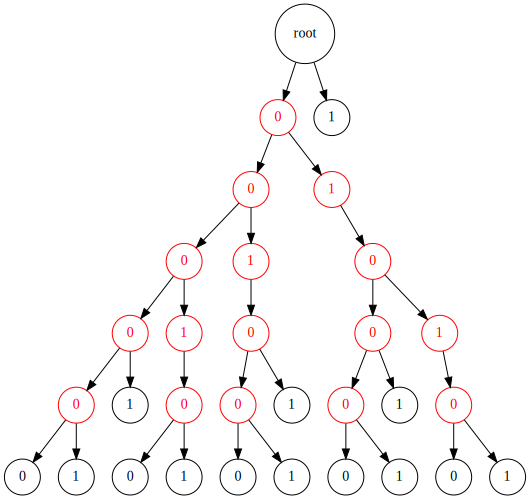

In [191]:
g4l.display.draw_tree(t)